<a href="https://colab.research.google.com/github/Jojo0117/Analysis-of-bank-customer-behavior/blob/main/Behavior.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
accts = pd.read_csv("BusinessCase_Accts.csv")
custs = pd.read_csv("BusinessCase_Custs.csv")
tx = pd.read_csv("BusinessCase_Tx.csv")

In [ ]:
accts.head()

In [ ]:
custs.head()

In [ ]:
tx.head()

,Unnamed: 0,description,currencyAmount,locationRegion,locationCity,originationDateTime,customerId,merchantId,accountId,categoryTags
0,0,ADP PMT 59964899,1092.22,NaN,NaN,2018-06-28T00:00:00.001Z,fe51c153-fbec-4b64-9b00-2530035ef0e1_fa967441-...,NaN,fe51c153-fbec-4b64-9b00-2530035ef0e1_5b35142d-...,Income
1,1,ADP PMT 78870688,701.11,NaN,NaN,2018-06-28T00:00:00.001Z,fe51c153-fbec-4b64-9b00-2530035ef0e1_ee129e70-...,NaN,fe51c153-fbec-4b64-9b00-2530035ef0e1_9172eb97-...,Income
2,2,ROGERS CABLE E2I6X9,111.98,NaN,NaN,2018-04-30T00:00:00.002Z,fe51c153-fbec-4b64-9b00-2530035ef0e1_ad635ae8-...,3d99af81-c081-4d73-bc44-d3a8e639b22a,fe51c153-fbec-4b64-9b00-2530035ef0e1_b527eb36-...,Bills and Utilities
3,3,TIM HORTONS #990 _F,1.16,NaN,NaN,2018-10-09T15:30:00Z,fe51c153-fbec-4b64-9b00-2530035ef0e1_12bd4e47-...,7cc23aa6-0671-4c44-a1b5-b8a98d4bc5d4,fe51c153-fbec-4b64-9b00-2530035ef0e1_1185d0e2-...,Food and Dining
4,4,EMAIL TFR C0***oHp,41.00,NaN,NaN,2018-07-05T00:00:00.001Z,fe51c153-fbec-4b64-9b00-2530035ef0e1_fb97a9de-...,NaN,fe51c153-fbec-4b64-9b00-2530035ef0e1_bf889f32-...,Transfer


# Q1-What branch has the most number of customers?

In [ ]:
accts["branchNumber"].value_counts()

1029     302
1512     228
330      204
392      180
374      178
        ... 
1277       4
11237      2
11372      2
1802       2
11453      2
Name: branchNumber, Length: 175, dtype: int64

# Q2-How old is the oldest customer as of 2019-07-01?

In [ ]:
from datetime import datetime, date
custs['birthDate']=custs['birthDate'].apply(pd.to_datetime)
custs["age"] = (pd.to_datetime("2019-07-01") - custs["birthDate"]).astype('<m8[Y]') #astype()啥意思，咋用？？
# datetime ????
custs["age"].max()

106.0

# Q3-How many accounts does the oldest customer have?

In [ ]:
custs[custs["age"]==106]

,Unnamed: 0,id,type,gender,birthDate,workActivity,occupationIndustry,totalIncome,relationshipStatus,habitationStatus,addresses_principalResidence_province,schoolAttendance,schools,age
2146,2146,fe51c153-fbec-4b64-9b00-2530035ef0e1_522519ff-...,Personal,Female,1912-10-22,NaN,Retired,52652.6,Widowed,NaN,ON,NaN,NaN,106.0
5241,5241,fe51c153-fbec-4b64-9b00-2530035ef0e1_3e49a7de-...,Personal,Other,1913-04-04,NaN,Retired,62953.1,Widowed,Group,ON,NaN,NaN,106.0


In [ ]:
accts[accts["cust_id"]=="fe51c153-fbec-4b64-9b00-2530035ef0e1_522519ff-5e56-4d8a-9888-560f2cde4938"]

,Unnamed: 0,branchNumber,type,openDate,id,iban,balance,currency,cust_id
3956,3956,1512,DDA,3/1/2018,fe51c153-fbec-4b64-9b00-2530035ef0e1_cbe429f1-...,NaN,-10878.33,CAD,fe51c153-fbec-4b64-9b00-2530035ef0e1_522519ff-...
3957,3957,1512,SDA,3/1/2018,fe51c153-fbec-4b64-9b00-2530035ef0e1_d8819f65-...,NaN,21061.04,CAD,fe51c153-fbec-4b64-9b00-2530035ef0e1_522519ff-...


In [ ]:
accts[accts["cust_id"]=="fe51c153-fbec-4b64-9b00-2530035ef0e1_3e49a7de-d1c6-4877-9686-057a5c020cfc"]

,Unnamed: 0,branchNumber,type,openDate,id,iban,balance,currency,cust_id
5722,5722,1592,DDA,3/1/2018,fe51c153-fbec-4b64-9b00-2530035ef0e1_0594a24b-...,NaN,39636.71,CAD,fe51c153-fbec-4b64-9b00-2530035ef0e1_3e49a7de-...
5723,5723,1592,SDA,3/1/2018,fe51c153-fbec-4b64-9b00-2530035ef0e1_d02d2301-...,NaN,25381.24,CAD,fe51c153-fbec-4b64-9b00-2530035ef0e1_3e49a7de-...


# Q4-How many transactions went to Starbucks in April?

In [ ]:
tx[tx["description"].str.contains("STARBUCKS")&tx["originationDateTime"].str.contains("2018-04")]

,Unnamed: 0,description,currencyAmount,locationRegion,locationCity,originationDateTime,customerId,merchantId,accountId,categoryTags
117,117,STARBUCKS #21387,5.40,NaN,NaN,2018-04-03T07:25:00Z,fe51c153-fbec-4b64-9b00-2530035ef0e1_f3e9ac5c-...,eabb92a0-de8b-4dba-8028-583eb3ce8d97,fe51c153-fbec-4b64-9b00-2530035ef0e1_9da9bd36-...,Food and Dining
504,504,STARBUCKS #4711,1.52,NaN,NaN,2018-04-20T14:23:00Z,fe51c153-fbec-4b64-9b00-2530035ef0e1_bbc8b795-...,3b7a8aa8-970a-4e82-b2af-89521c0dabb8,fe51c153-fbec-4b64-9b00-2530035ef0e1_079876bf-...,Food and Dining
786,786,STARBUCKS #21387,2.55,NaN,NaN,2018-04-13T16:25:00Z,fe51c153-fbec-4b64-9b00-2530035ef0e1_52f0a4e7-...,eabb92a0-de8b-4dba-8028-583eb3ce8d97,fe51c153-fbec-4b64-9b00-2530035ef0e1_bcc0a3ee-...,Food and Dining
913,913,STARBUCKS #16997,1.46,NaN,NaN,2018-04-06T08:33:00Z,fe51c153-fbec-4b64-9b00-2530035ef0e1_3bd772c4-...,1ac41e37-67db-48ec-9f2d-509c76363ccf,fe51c153-fbec-4b64-9b00-2530035ef0e1_8b9e8d96-...,Food and Dining
977,977,STARBUCKS #25829,5.09,NaN,NaN,2018-04-27T10:02:00Z,fe51c153-fbec-4b64-9b00-2530035ef0e1_77480f82-...,d2e9fc18-b6a8-4014-8d1a-0886479dae50,fe51c153-fbec-4b64-9b00-2530035ef0e1_ef6903e5-...,Food and Dining
...,...,...,...,...,...,...,...,...,...,...
90567,90567,STARBUCKS #29957,5.07,NaN,NaN,2018-04-10T18:53:00Z,fe51c153-fbec-4b64-9b00-2530035ef0e1_806b0d25-...,99cc7026-c1d6-4787-81a6-0fdf6a493362,fe51c153-fbec-4b64-9b00-2530035ef0e1_f59e4d09-...,Food and Dining
90850,90850,STARBUCKS #4208,6.52,NaN,NaN,2018-04-11T08:58:00Z,fe51c153-fbec-4b64-9b00-2530035ef0e1_9e304a40-...,6ed29f17-d599-41e4-a9fd-e3ba45f00ec7,fe51c153-fbec-4b64-9b00-2530035ef0e1_fb1715fb-...,Food and Dining
91888,91888,STARBUCKS #4226,6.22,NaN,NaN,2018-04-24T19:38:00Z,fe51c153-fbec-4b64-9b00-2530035ef0e1_d89f8e00-...,638d6653-862c-4f49-88ac-34e238cdefe0,fe51c153-fbec-4b64-9b00-2530035ef0e1_08fdac23-...,Food and Dining
91900,91900,STARBUCKS #4254,6.15,NaN,NaN,2018-04-27T14:06:00Z,fe51c153-fbec-4b64-9b00-2530035ef0e1_81a0f251-...,9bdd6b0d-60cb-402e-9974-797404428ed3,fe51c153-fbec-4b64-9b00-2530035ef0e1_421c5733-...,Food and Dining


# Q5-How much was spent on Starbucks in April?

In [ ]:
tx[tx["description"].str.contains("STARBUCKS")&tx["originationDateTime"].str.contains("2018-04")]["currencyAmount"].sum()

1720.87

# Q6-Is the average spend at Starbucks significantly different in April compared to June?

In [ ]:
# mean in April
tx[tx["description"].str.contains("STARBUCKS")&tx["originationDateTime"].str.contains("2018-04")]["currencyAmount"].mean()

4.356632911392409

In [ ]:
# mean in June
tx[tx["description"].str.contains("STARBUCKS")&tx["originationDateTime"].str.contains("2018-06")]["currencyAmount"].mean()

4.4984334203655365

# Q7-Which day exhibited the highest average spend above trend (based on a 10-day moving average) at Starbucks?

In [ ]:
df=tx[tx['description'].str.contains("STARBUCKS")]
df['originationDateTime']=pd.to_datetime(df['originationDateTime'])
df['time']=df['originationDateTime'].dt.strftime('%Y-%m-%d')
df = df.sort_values(by="time") 



In [ ]:
df['currencyAmount'].rolling(window=10).mean().max()

In [ ]:
df[df['currencyAmount'].rolling(window=10).mean()==6.563000000000002]

,Unnamed: 0,description,currencyAmount,locationRegion,locationCity,originationDateTime,customerId,merchantId,accountId,categoryTags,time
68549,68549,STARBUCKS #4711,6.0,NaN,NaN,2018-10-18 10:59:00+00:00,fe51c153-fbec-4b64-9b00-2530035ef0e1_bbc8b795-...,3b7a8aa8-970a-4e82-b2af-89521c0dabb8,fe51c153-fbec-4b64-9b00-2530035ef0e1_079876bf-...,Food and Dining,2018-10-18


# Part2-Business Case

Q1: We are planning to launch a new product focused on a specific merchant category (e.g. travel credit card). Which specific merchant category would you like to focus on for this new product?  Please explain your rationale for this category incorporating both the insights derived from the data and other concepts where you see fit.

In [ ]:
tx["categoryTags"].value_counts()

Transfer               40700
Income                 17391
Bills and Utilities    16118
Food and Dining        11346
Taxes                   2095
Mortgage and Rent       1599
Shopping                1431
Home                     599
Fees and Charges         503
Travel                   212
Entertainment            126
Auto and Transport        30
Health and Fitness         8
Kids                       2
Name: categoryTags, dtype: int64

**Income inverstment **
It happens relativelt often among all transactions.

Q2:Identify and describe various segments of customers within the data

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
custs["gender"].value_counts()

Female    2701
Male      2383
Other      561
Name: gender, dtype: int64

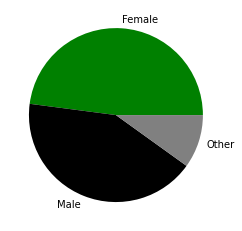

In [ ]:
y = np.array([2710,2383,561])
labels = ["Female","Male","Other"]
cls = ["green","black","grey"]
plt.pie(y, labels=labels, colors=cls);

In [ ]:
custs["workActivity"].value_counts()


fulltime    2446
parttime    1754
Name: workActivity, dtype: int64

In [ ]:
custs.count()
unemployed = 5645-4200

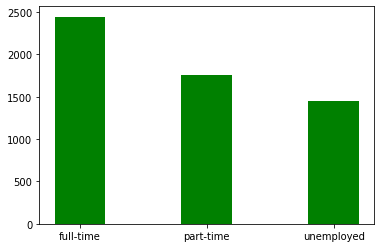

In [ ]:
x =["full-time","part-time","unemployed"]
y = [2446,1754,unemployed]
plt.bar(x,y,width=0.4,color="green");

In [ ]:
custs["relationshipStatus"].value_counts()

Married      2558
Single       2054
Divorced      472
Widowed       346
Separated     215
Name: relationshipStatus, dtype: int64

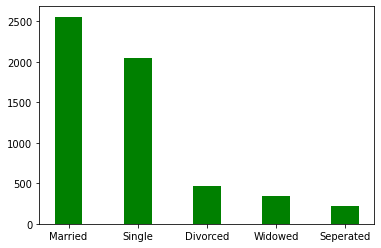

In [ ]:
x = ["Married","Single","Divorced","Widowed","Seperated"]
y = [2558,2054,472,346,215]
plt.bar(x,y,width=0.4,color="green");

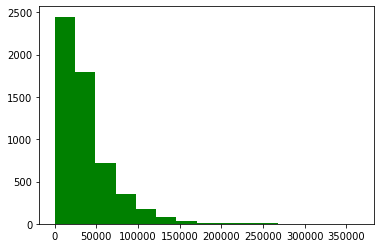

In [ ]:
plt.hist(custs['totalIncome'], bins=15,color="green");

In [ ]:
custs["schoolAttendance"].value_counts()

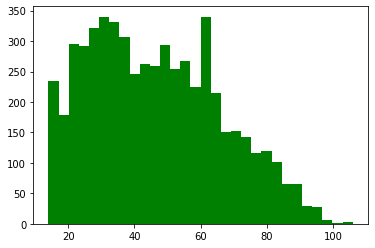

In [ ]:
plt.hist(custs["age"], bins=30, color="green");

Q3:Of the segments that you created in question 2, which specific segment would you like to target for this new product? Why would you target them? What are the potential challenges/risks to consider when targeting this segment vs. others?

In [ ]:
 # Since our product is about income inverstment, our target customers should be people with steady incomes, that is, customers with decent total income 
 # and customers with jobs(both full-time and part-time). 

 # The risk: customers with high total income may not be willing to invest their money using our product.
 # It might be aged 

In [ ]:
income_tx=tx[tx['categoryTags']=='Income']

In [ ]:
new=custs.merge(income_tx,left_on='id', right_on='customerId')

In [ ]:
new['occupationIndustry'].value_counts()

Retired                                                                                          2985
5221 Depository credit intermediation                                                             794
6220 Hospitals (6221 to 6223)                                                                     515
6111 Elementary and secondary schools                                                             491
5411 Legal services                                                                               372
                                                                                                 ... 
3333 Commercial and service industry machinery manufacturing                                        2
3312 Steel product manufacturing from purchased steel                                               2
7131 Amusement parks and arcades                                                                    2
3252 Resin, synthetic rubber, and artificial and synthetic fibres and filaments ma

In [ ]:
new.count()
